# Домашнее задание 5

В этом задании предлагается поближе познакомиться с `решающими деревьями` и `случайными лесами`, а также поучаствовать в соревновании **House Prices: Advanced Regression Techniques**

Оформление дз:
Присылайте выполненное на почту `mlphystech@gmail.com` файлы .pdf и .ipynb или ссылку на свой гитхаб.

**Дедлайн: 25 апреля 23:59**

при составлении ДЗ использованы материалы кафедры **АТП**

## Теоретическая часть
#### 1.5 балла

1. Что такое решающее дерево? Почему так называется?
2. В чем основная идея этого алгоритма?
3. Что такое решающее правило?
4. Что можно сказать про проблему переобучения для решающих деревьев?
5. Что такое отбор признаков по feature_importance? 
6. Что такое PCA?

1 - Структура принятия решений, которая является деревом. Чаще всего это бинарное дерево.
2 - Может обрабатывать нелинейные зависимости между переменными. Легко интерпретируется человеком
3 - Это то, что находится в узле дерева. Решающее правило позволяет классифицировать объекты по признакам
4 - Переобучение играет нам на руку, когда мы используем случайный лес. Такой метод позволяет нам учится на ошибках других деревьев по принципу Анны Карениной „Все счастливые семьи похожи друг на друга, каждая несчастливая семья несчастлива по-своему.“ Однако, если мы просто используем решающее дерево, то если оно будет переобучено, то на других данных оно покажет плохой результат.
5 - Оценка каждого признака по важности. Чем выше важность, тем большую роль играет признак в выборке.
6 - Алгоритм, позволяющий понизить размерность данных. В основе метода лежит проекция на собственный вектор и переход от N мерного пространства к пространству с пониженой размерностью, с минимальной потерей данных

## Практическая чать 1. Решающие деревья
#### 3.5 балла
Здесь предлагается использовать решающие деревья для того, чтобы поработать с датасетом, в котором содержится информация о картинках с ядовитыми и съедобными грибами: https://www.kaggle.com/uciml/mushroom-classification

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# считайте данные из датасета при помощи функции read_csv:
df = pd.read_csv('mushrooms.csv')

In [213]:
# проверьте, что в датасете нет пустых строк:
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [214]:
from sklearn.model_selection import train_test_split


# Разбейте данные на тестовую и тренировочную части
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
# Посмотрите на информацию о данных. Что вы можете сказать о них? 
# таблица содержит 8124 записи, записи являются целочисленными.
x.info()
y.info()
x.dtypes
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
e    8124 non-null uint8
p    8124 non-null uint8
dtypes: uint8(2)
memory usage: 15.9 KB


Займемся отбором параметров. Используем кросс-валидацию

In [215]:
from sklearn.model_selection import cross_val_score
from sklearn import tree # здесь лежит нужный нам классификатор DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion' : ('gini', 'entropy'), 
    'min_samples_split' : [2, 3, 4, 5], 
    'max_depth' : [9, 10, 11, 12],
    'class_weight' : ('balanced', None),
    'presort' : (False, True),
}


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
q = gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
gsearch.cv_results_
scores = cross_val_score(model, X_test, y_test, cv=5)
print(scores)
model.fit(X_train, y_train)


[0.99692308 1.         1.         0.99692308 0.99692308]


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best')

 Выведите `gsearch`. Что вы можете сказать об этом? Что это и зачем нужно?

# Выбераем оптимальные параметры для решающего дерева

In [207]:
# Посчитайте скор
score = model.score(X_test, y_test)
# ...
score

1.0

Давайте посмотрим, как же устроено наше дерево? Сделать можно это с помощью следующего кода: 

P.S. возможно, что вам придется установить библиотеку `graphviz`. Устанавливается она точно также, как и любая другая бибилиотека.

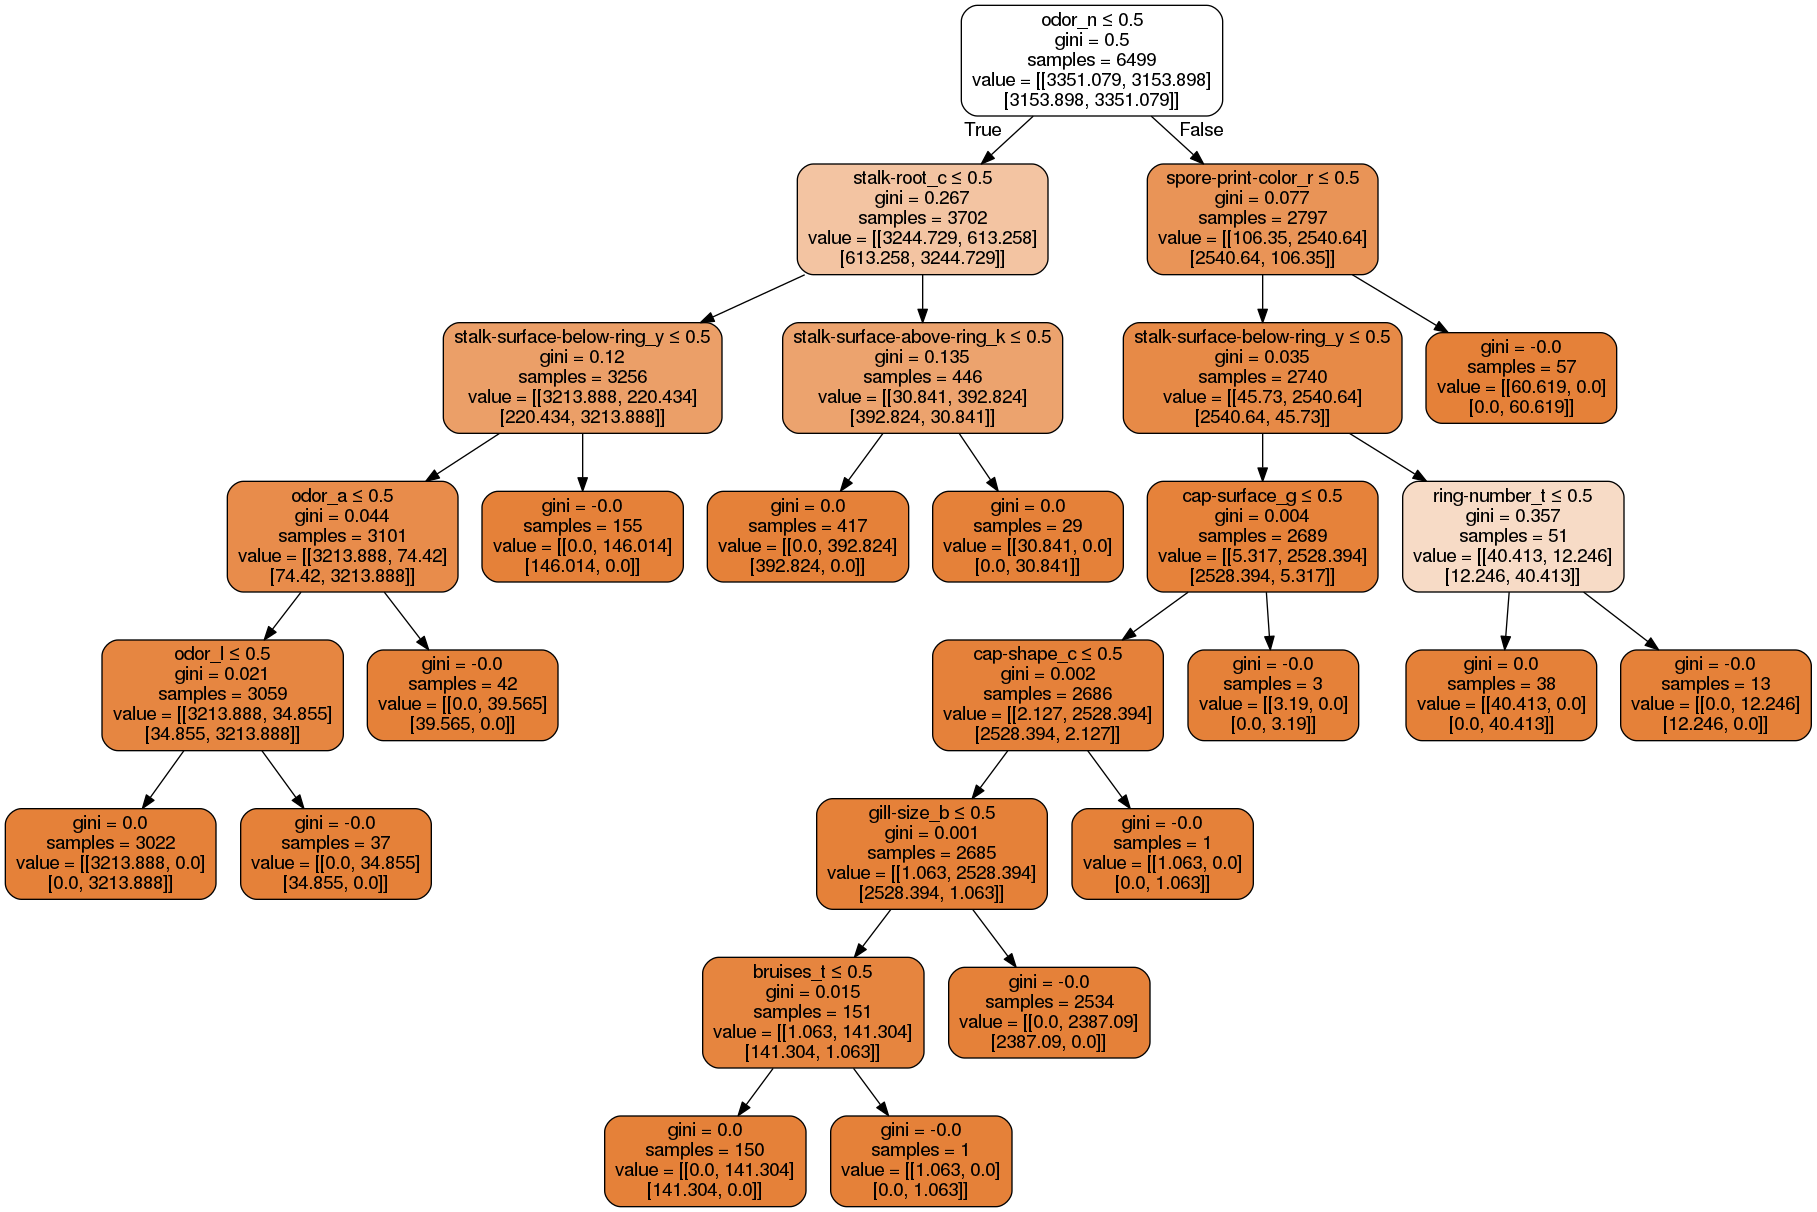

In [197]:
import graphviz
import pydotplus
import IPython

dot_data = tree.export_graphviz(model, out_file='tree',
                                feature_names = X_test.columns,
                                class_names = y_test.columns,
                                filled=True, rounded = True,
                                special_characters=True)

graph = pydotplus.graphviz.graph_from_dot_file("tree")  
image = IPython.display.Image(graph.create_png())
IPython.display.display(image)

Какие выводы вы можете сделать об устройстве решающего дерева?


Скорее всего, дерево переобучено, так как, имеется 2 листа на которых samples = 1. Это означает, что дерево просто подгоняет ответы, а не выводит зависимость. Также имеется несколько ячеек, где samples > 100. Мне кажется, что количество таких ячеек должно сводится к минимуму, такое дерево, как мне кажется, является переобученым

## Практическая часть 2. Случайные леса.
### 2 балла
В этой части задания мы будем работать с датасетом https://www.kaggle.com/c/house-prices-advanced-regression-techniques c `kaggle`.

Предложенный код можно использовать как угодно -- если вам удобнее написать все свое, можете все удалить

In [101]:
%matplotlib inline

In [190]:
# скачайте данные train и test при помощи функции read_csv 
train = pd.read_csv('tree_train.csv')
test = pd.read_csv('tree_test.csv')

In [103]:
# выведите названия столбцов. 
# Предположите, какие из них могут быть важны, исходя из вашего жизненного опыта и интуиции?
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

выделим необходимые данные:

In [104]:
labels = train.SalePrice

In [105]:
labels.head(4)

0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64

Постройте график распределения цен на жилье. Какое распределение оно вам напоминает?

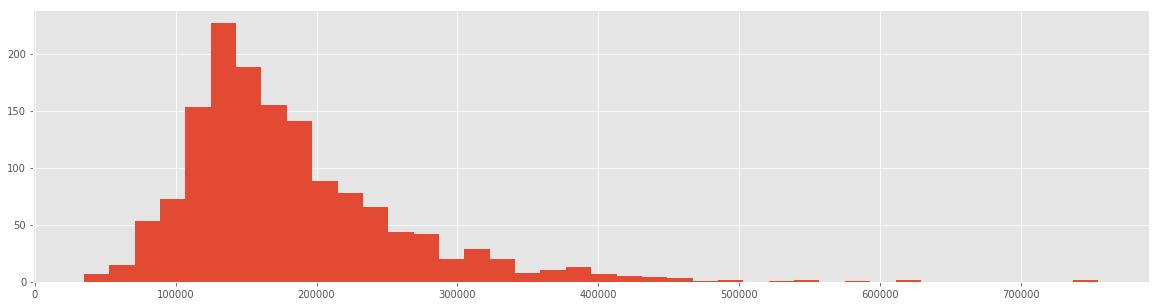

In [106]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.hist(train['SalePrice'],bins=40)
plt.show()

In [107]:
# выведите данные
print(train.shape)


(1460, 81)


Cоздадим датасет и назовем его `all` из конкатенации train, test.

P.S. Если будете использовать функцию `concat`, не забудьте установить `axis`=0

In [158]:
# df = pd.concat([train, test], axis = 0)

Заменим пустые данные `null` на средние значения и отформатируем данные:

In [159]:
# print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
# for col in train.columns:
#     print("{0:15}\t{1:.2f}\t{2}".format(col, train[col].isnull().mean(), train[col].nunique()))

Используйте известные вам методы для отбора признаков. Удалите ненужные признаки.
Не забудьте нормализовать (оцифровать) данные!

In [191]:
# тут ваш код
from sklearn import preprocessing

# df = pd.concat([train, test], axis = 0)
# df = df.astype(str)
train = train.astype(str)
train.drop(['PoolQC', 'Fence', 'Alley', 'MiscFeature'], axis=1, inplace=True)

encoder = preprocessing.LabelEncoder()

for i in train.columns:
    # print(type(train[i].values[0]))
    if type(train[i].values[0]) == np.str:
        encoder.fit(train[i])
        train[i] = encoder.transform(train[i])
        
train.fillna(train.mean(), axis=0, inplace=True)
train
# print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
# for col in df.columns:
#      print("{0:15}\t{1:.2f}\t{2}".format(col, df[col].isnull().mean(), df[col].nunique()))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,9,3,75,859,1,3,3,0,4,...,0,0,0,0,0,4,2,8,4,343
1,572,4,3,90,1030,1,3,3,0,2,...,0,0,0,0,0,7,1,8,4,270
2,683,9,3,78,161,1,0,3,0,4,...,0,0,0,0,0,11,2,8,4,373
3,794,10,3,70,1021,1,0,3,0,0,...,78,0,0,0,0,4,0,8,0,125
4,905,9,3,94,386,1,0,3,0,2,...,0,0,0,0,0,3,2,8,4,425
5,1016,8,3,95,376,1,0,3,0,4,...,0,16,0,0,18,1,3,8,4,134
6,1127,4,3,85,11,1,3,3,0,4,...,0,0,0,0,0,10,1,8,4,504
7,1238,9,3,110,52,1,0,3,0,0,...,63,0,0,0,8,2,3,8,4,321
8,1349,8,4,61,668,1,3,3,0,4,...,52,0,0,0,0,6,2,8,0,82
9,1,3,3,60,754,1,3,3,0,0,...,0,0,0,0,0,0,2,8,4,44


In [173]:
# some useless features
train["MiscFeature"].value_counts()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [16]:
train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [ ]:
to_drop = ["MiscFeature", "PoolQC"]
to_replace_to_none = ["Fence", "FireplaceQu", "Alley"]

for col in to_replace_to_none:
    #тут ваш код
    
all.drop(to_drop, axis=1, inplace=True, errors="ignore")
all.fillna(-1, inplace=True)

Визуализируем данные:

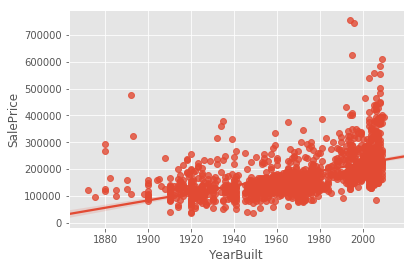

In [24]:
sns.regplot(train["YearBuilt"], labels)

Что можно сказать о таком распределении данных?

'\nA\tAgriculture\nC\tCommercial\nFV\tFloating Village Residential\nI\tIndustrial\nRH\tResidential High Density\nRL\tResidential Low Density\nRP\tResidential Low Density Park \nRM\tResidential Medium Density\n'

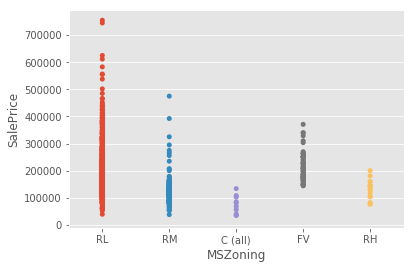

In [22]:
sns.stripplot(train["MSZoning"], labels)
"""
A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park 
RM	Residential Medium Density
"""

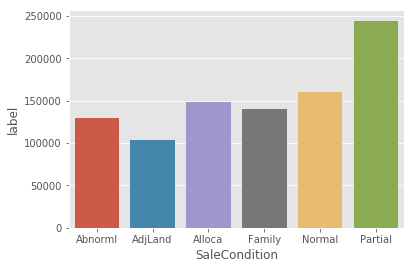

In [23]:
group_col = "SaleCondition"

train_with_labels = train.copy()
train_with_labels["label"] = labels
groupped = train_with_labels.groupby(group_col).median().reset_index()[[group_col, "label"]]
sns.barplot(groupped[group_col], groupped.label)

In [ ]:
categorial = #тут ваши отобранные признаки
for col in categorial:
    all[col] = all[col].factorize()[0]
    
train = all.iloc[:train.shape[0]]
test = all.iloc[train.shape[0]:]

In [298]:
from sklearn.feature_extraction import DictVectorizer
 
#  энкодер, которым Вы можете воспользоваться
def encode_onehot(df, cols):

    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df



In [30]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=0)

In [31]:
# выведите ваш датасет. Посмотрите, как он выглядит после нормализации и отбора признаков?

In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

to_encode = #отобранные фичи
df = train
for column in to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

Функция для формирования посылки в `kaggle`

In [40]:
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)


In [ ]:
#train = encode_onehot (train,train.columns)
clf = RandomForestClassifier(...)
clf.fit(...)
preds = clf.predict(test)
submit(np.expm1(...))

In [41]:
def code_freq(data, col):
    return data[col].map(data.groupby(col).count().iloc[:, 0] / data.shape[0])

In [42]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict

class MeanEncoder(BaseEstimator):
    def __init__(self, col):
        self.col = col
        
    def fit(self, X, y):
        X_copy = X.copy()
        X_copy['target'] = y
        self.encoding = X_copy.groupby(col)['target'].mean()
        return self
        
    def predict(self, X):
        return X[col].map(self.encoding).fillna(-1)



def code_mean(train, test, labels, col, cv):
    mean_encoder = MeanEncoder(col)
    train_col = cross_val_predict(mean_encoder, train, labels, cv=cv)
    test_col = mean_encoder.fit(train, labels).predict(test)
    
    return train_col, test_col

Какой скор вам удалось получить? Как вы считаете, результат хороший или не очень?

## Практическая часть 3. Cлучайные леса.

#### 3 балла
Подумайте, какие образом можно улучшить скор?

Вот идеи:
1. Попробовать подобрать нужные параметры. Для этого можно исследовать данные, посмотреть, как они распределены и что важно, а что -- не очень
2. Найти, какие категориальные признаки являются ординальными и закодировать их соответственно
3. Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
4. Сгенерировать новые признаки
